In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.graph_objs as go
import yellowbrick

import time

In [2]:
sites_df = pd.read_csv("phishing_site_urls.csv", header = 0)
sites_df = sites_df.dropna()
sites_df = sites_df.drop_duplicates()
sites_df = sites_df.drop(columns=['URL','Domain','TLD','Title'])


print(sites_df.info())
print(sites_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   TLDLength                   235795 non-null  int64  
 3   NoOfSubDomain               235795 non-null  int64  
 4   NoOfLettersInURL            235795 non-null  int64  
 5   LetterRatioInURL            235795 non-null  float64
 6   NoOfDegitsInURL             235795 non-null  int64  
 7   DegitRatioInURL             235795 non-null  float64
 8   NoOfEqualsInURL             235795 non-null  int64  
 9   NoOfQMarkInURL              235795 non-null  int64  
 10  NoOfAmpersandInURL          235795 non-null  int64  
 11  NoOfOtherSpecialCharsInURL  235795 non-null  int64  
 12  SpacialCharRatioInURL       235795 non-null  float64
 13  IsHTTPS       

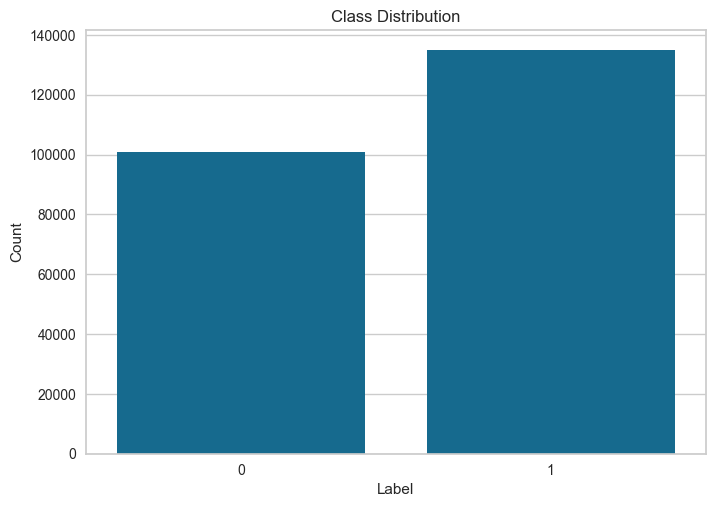

In [3]:
sns.countplot(x='label', data=sites_df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#0 represents a benign website and 1 represents a phishing website

In [4]:
sites_df.describe()

,URLLength,DomainLength,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,...,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSubmitButton,HasHiddenFields,HasPasswordField,NoOfImage,NoOfCSS,NoOfJS,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,2.764456,1.164758,19.428919,0.515946,1.881011,0.028616,0.062241,0.029403,...,0.221765,1.588638,0.043987,0.414301,0.377799,0.102263,26.075689,6.333111,10.522305,0.571895
std,41.314153,9.150793,0.599739,0.600969,29.090330,0.123315,11.886695,0.070897,0.934704,0.193505,...,3.870540,5.762561,0.205067,0.492602,0.484838,0.302994,79.411815,74.866296,22.312192,0.494805
min,13.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,2.000000,1.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,3.000000,1.000000,14.000000,0.519000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,1.000000
75%,34.000000,24.000000,3.000000,1.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,29.000000,8.000000,15.000000,1.000000
max,6097.000000,110.000000,13.000000,10.000000,5191.000000,0.926000,2011.000000,0.684000,176.000000,4.000000,...,602.000000,1602.000000,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,1.000000


In [5]:
X = sites_df.iloc[:, :-1].values
y= sites_df.iloc[:, -1].values

y = y.astype(int)




In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with one neuron and sigmoid activation
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
time_start = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
time_end = time.time()
print(f"Training time: {time_end - time_start:.2f}s")

Epoch 1/20
2358/2358 [==============================] - 10s 4ms/step - loss: 0.0489 - accuracy: 0.9832 - precision: 0.9866 - recall: 0.9839 - val_loss: 0.0080 - val_accuracy: 0.9974 - val_precision: 0.9966 - val_recall: 0.9989
Epoch 2/20
2358/2358 [==============================] - 7s 3ms/step - loss: 0.0149 - accuracy: 0.9961 - precision: 0.9963 - recall: 0.9969 - val_loss: 0.0024 - val_accuracy: 0.9994 - val_precision: 0.9994 - val_recall: 0.9995
Epoch 3/20
2358/2358 [==============================] - 7s 3ms/step - loss: 0.0115 - accuracy: 0.9971 - precision: 0.9970 - recall: 0.9979 - val_loss: 0.0028 - val_accuracy: 0.9992 - val_precision: 0.9994 - val_recall: 0.9992
Epoch 4/20
2358/2358 [==============================] - 8s 3ms/step - loss: 0.0099 - accuracy: 0.9974 - precision: 0.9975 - recall: 0.9980 - val_loss: 0.0020 - val_accuracy: 0.9995 - val_precision: 0.9994 - val_recall: 0.9997
Epoch 5/20
2358/2358 [==============================] - 8s 4ms/step - loss: 0.0093 - accuracy: 

In [8]:
# Predict probabilities on test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




1474/1474 [==============================] - 2s 939us/step
Accuracy: 0.9996819270976908
Precision: 0.9997410668047644
Recall: 0.9997040872942482
F1 Score: 0.9997225767075404


In [9]:
x = model.predict(X_test[90:100])
x = (x >= 0.5).astype(int)
print(x)
print(y_test[90:100])

1/1 [==============================] - 0s 21ms/step
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
[0 1 1 1 1 1 1 0 0 0]


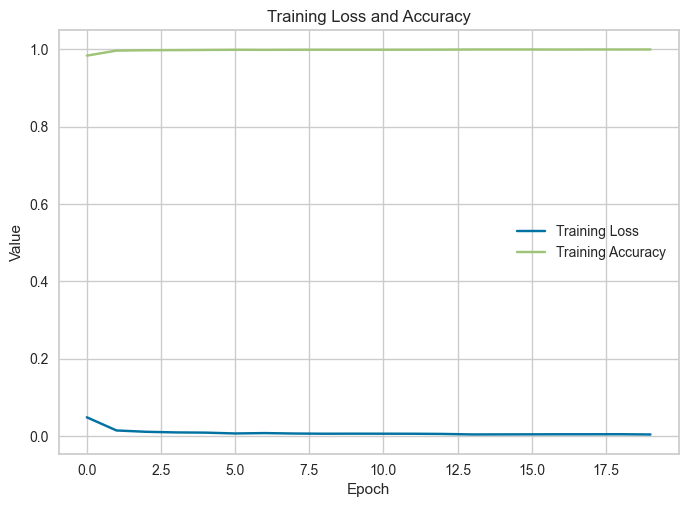

In [10]:
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss and Accuracy')
    plt.legend()
    plt.show()

# Assuming 'history' is the history object returned by model.fit()
plot_training_history(history)

1474/1474 [==============================] - 1s 843us/step


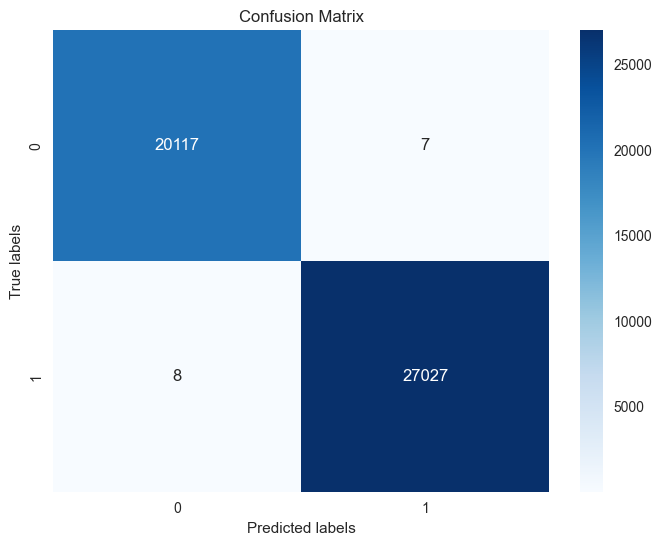

In [11]:
y_pred_proba = model.predict(X_test)

# Step 2: Convert probabilities to binary predictions based on a threshold (if needed)
# Example: Using a threshold of 0.5
y_pred_binary = (y_pred_proba >= 0.5).astype(np.int32)

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

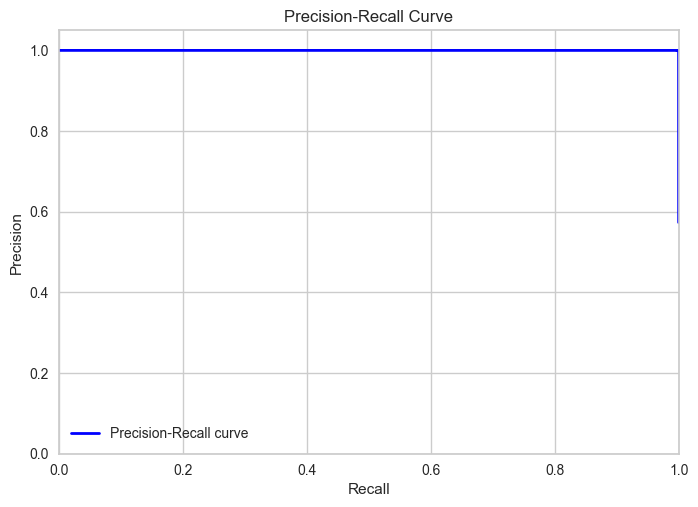

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [14]:
model.save("my_model.h5")